In [1]:
!pip install streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.4/823.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.0 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns


In [3]:
df = pd.read_excel("/content/Copper_Set.xlsx")
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [4]:
df["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

**Identifying No Of Unique Values**

In [5]:
print(len(df['item_date'].unique()))
print(len(df['customer'].unique()))
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique()))
print(len(df['delivery date'].unique()))

253
1170
16564
33
29


In [6]:
#Shape of the data
df.shape

(181673, 14)

In [7]:
# Null values
missing_values_count = df.isnull().sum()
print(missing_values_count)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [9]:
#Dealing with data in wrong format
# for categorical variables, this step is ignored
# df = df[df['status'].isin(['Won', 'Lost'])]
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [10]:
df["status"]= df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [11]:
#Nan values and shape after dealing with data in wrong format
#missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)
df.info()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64
(181673, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  float64
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 

In [12]:
#Dealing with Missing Values
# material_ref has large set of null values, so replacing them with unknown
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(181631, 14)


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181631.0,5.876231e+03,2.349346e+06,-2000.00,1.096801e+01,3.036395e+01,6.716187e+01,1.000000e+09
customer,181631.0,3.023251e+07,1.005626e+05,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,3.040818e+07
country,181631.0,4.489320e+01,2.440430e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181631.0,1.316576e+00,1.330326e+00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
application,181631.0,2.561597e+01,1.775382e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181631.0,2.564198e+00,6.572637e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181631.0,1.295267e+03,2.616441e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181631.0,4.740398e+08,7.175426e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181631.0,1.918367e+03,3.318331e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [14]:
df_p=df.copy()

In [15]:
#shape
df.shape

(181631, 14)

**Exploratory Data Analysis**

In [16]:
#PLOTTING

# ['quantity tons','selling_price','application','thickness','width', 'country']
# ['status','item type']

df_p['quantity tons']   # skewed
df_p['country']
df_p['application']
df_p['thickness']       # skewed
df_p['width']
df_p['selling_price']   # skewed

0          854.00
1         1047.00
2          644.33
3          768.00
4          577.00
           ...   
181668     591.00
181669     589.00
181670     619.00
181671     601.00
181672     607.00
Name: selling_price, Length: 181631, dtype: float64

**Handling Skewness**

In [17]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [18]:
skewed_columns=['quantity tons', 'customer', 'country', 'status',
                 'application', 'thickness', 'width', 'product_ref',
                'selling_price']

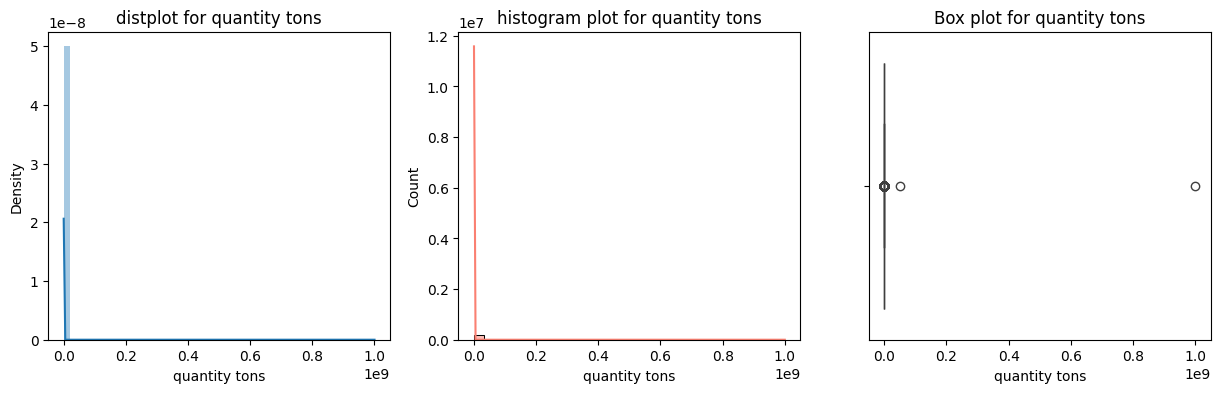

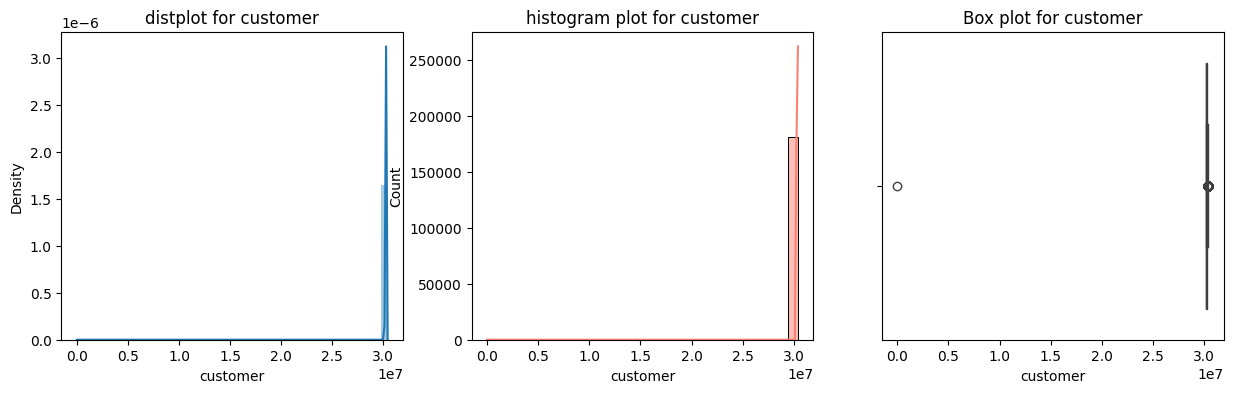

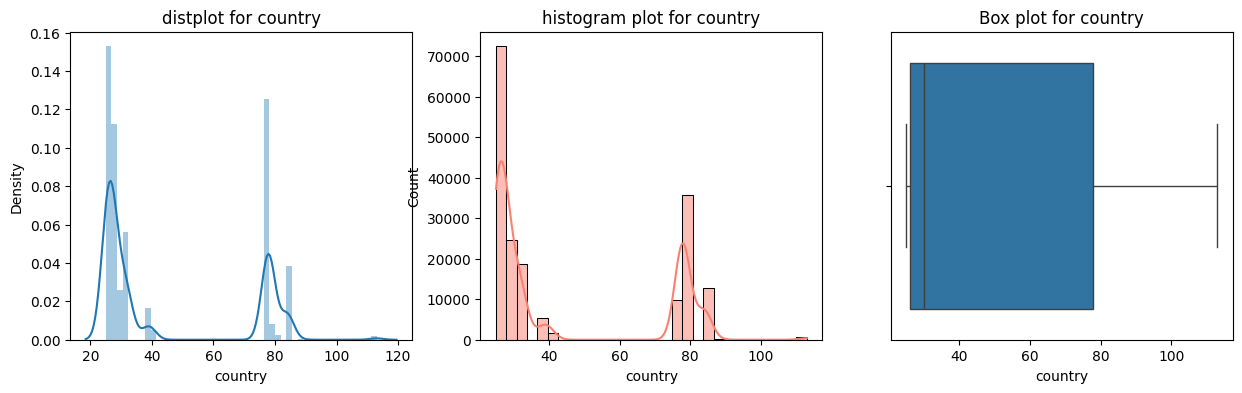

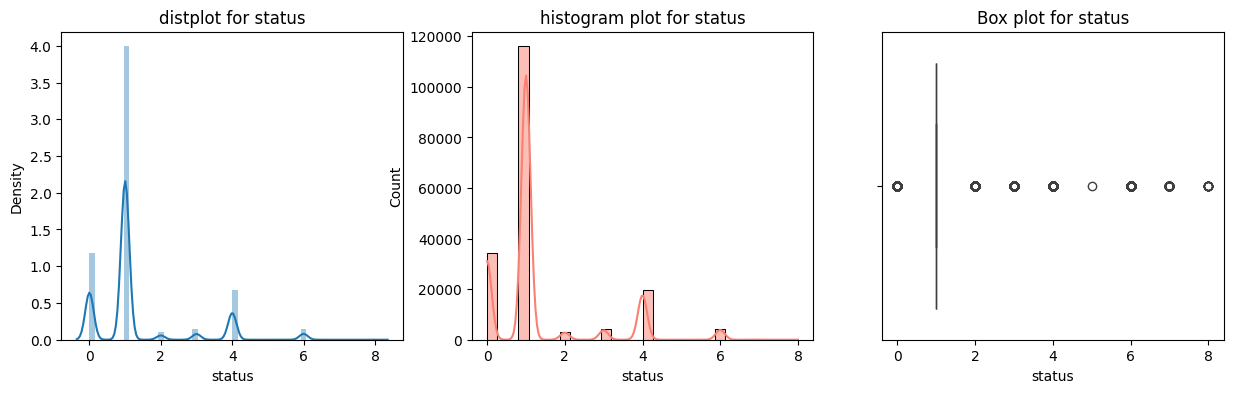

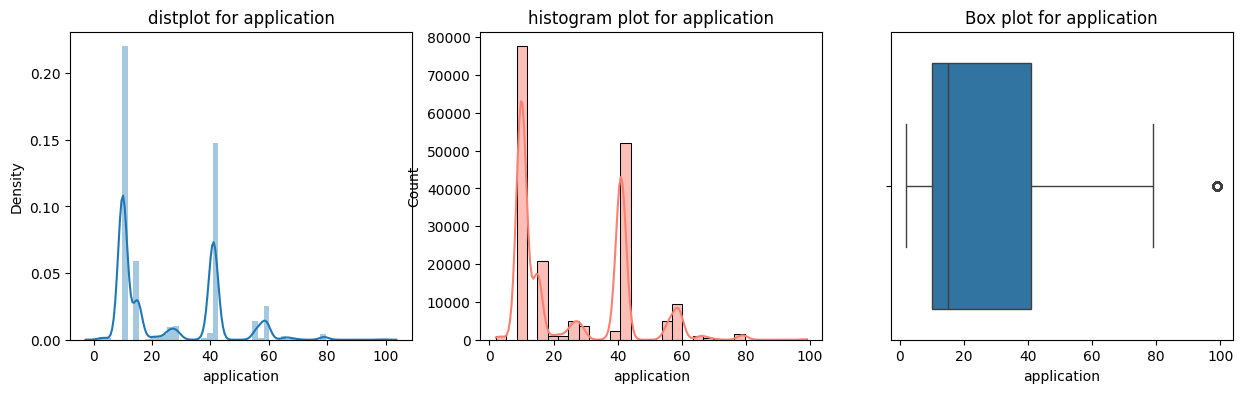

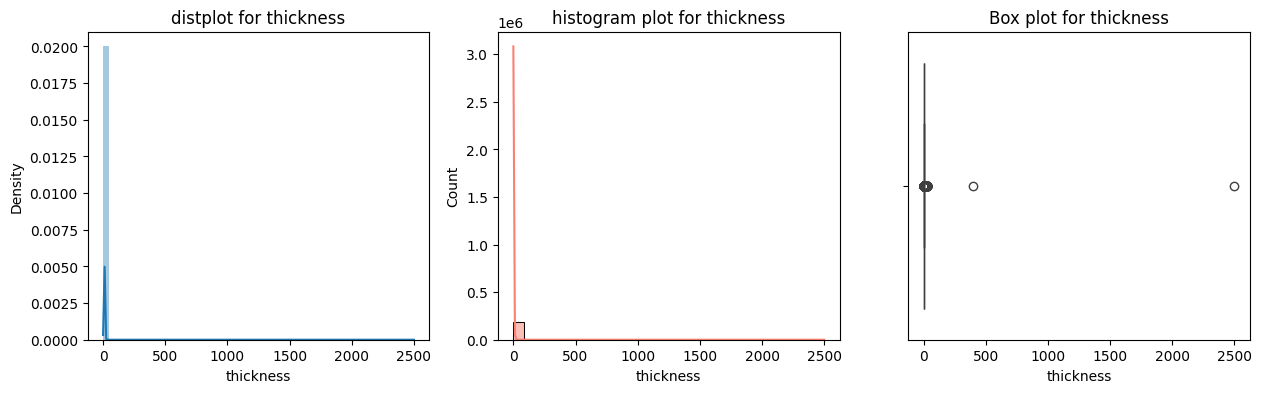

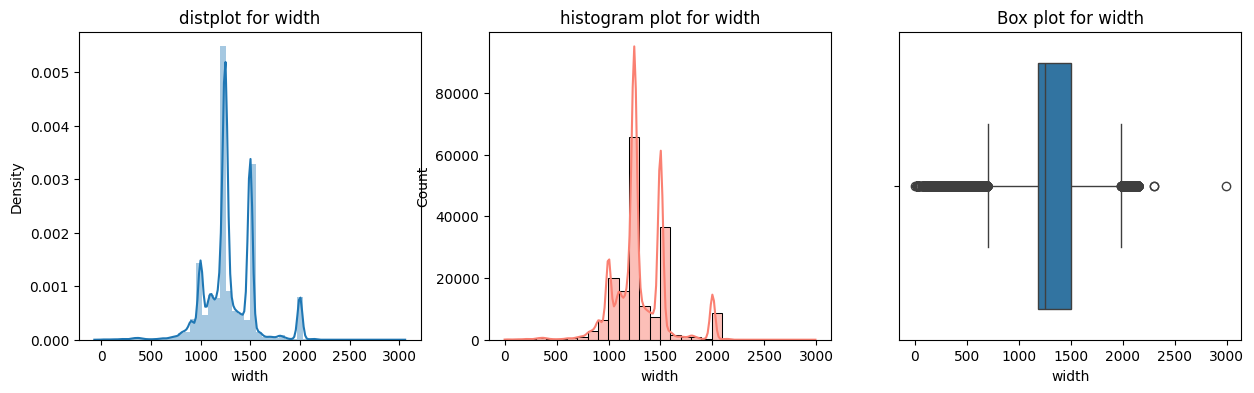

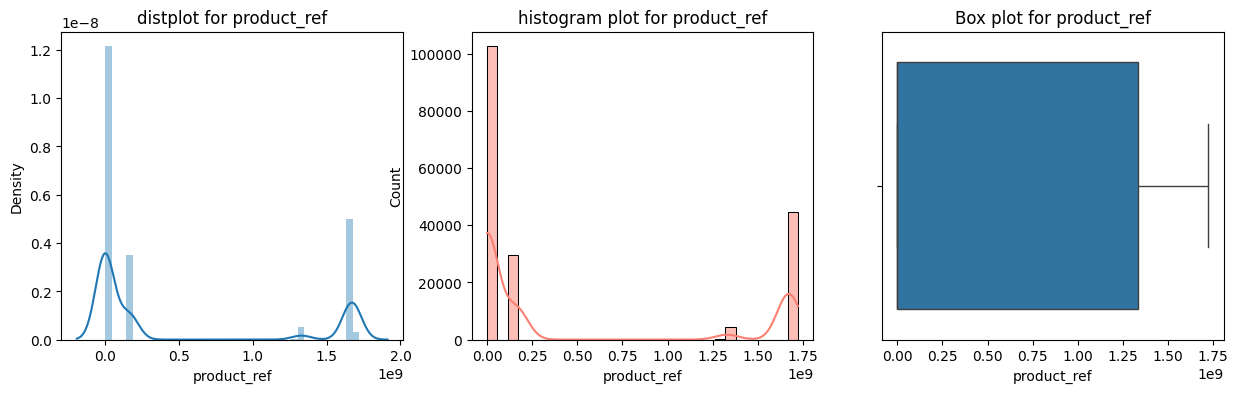

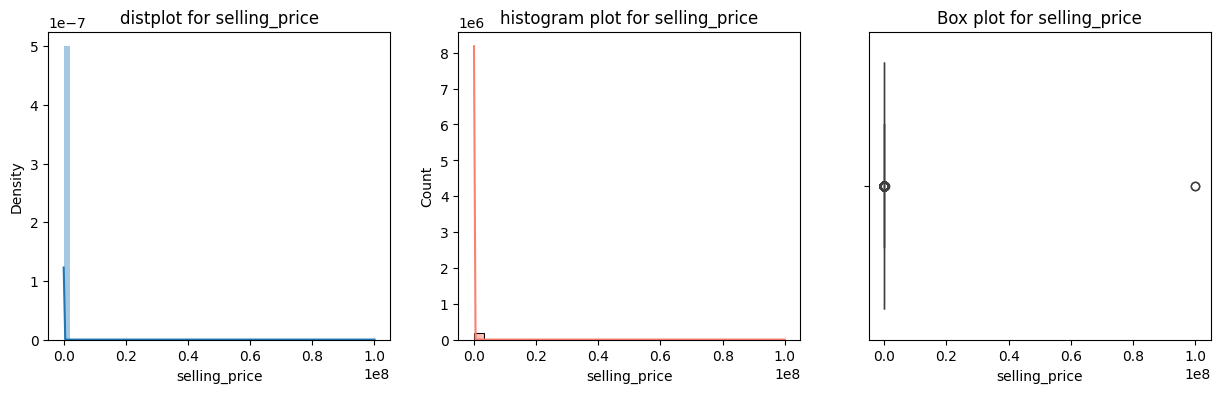

In [19]:
for i in skewed_columns:
  plot(df_p,i)

**Outlier Correction**

In [20]:
import numpy as np
mask1 = df_p['selling_price'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'selling_price'] = np.nan

mask1 = df_p['quantity tons'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_p['thickness'] <= 0
print(mask1.sum())

7
4
0


In [21]:
df_p.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [22]:
df_p.dropna(inplace=True)
len(df_p)


181620

In [23]:
df_p["item type"]= OrdinalEncoder().fit_transform(df_p[["item type"]])

In [24]:
df_p["item type"].unique()

array([5., 6., 3., 1., 2., 0., 4.])

**Scaling - Using Log Transformation**

In [25]:
df_p["quantity tons_log"]= np.log(df_p["quantity tons"])
df_p["thickness_log"]= np.log(df_p["thickness"])
df_p["selling_price_log"]= np.log(df_p["selling_price"])


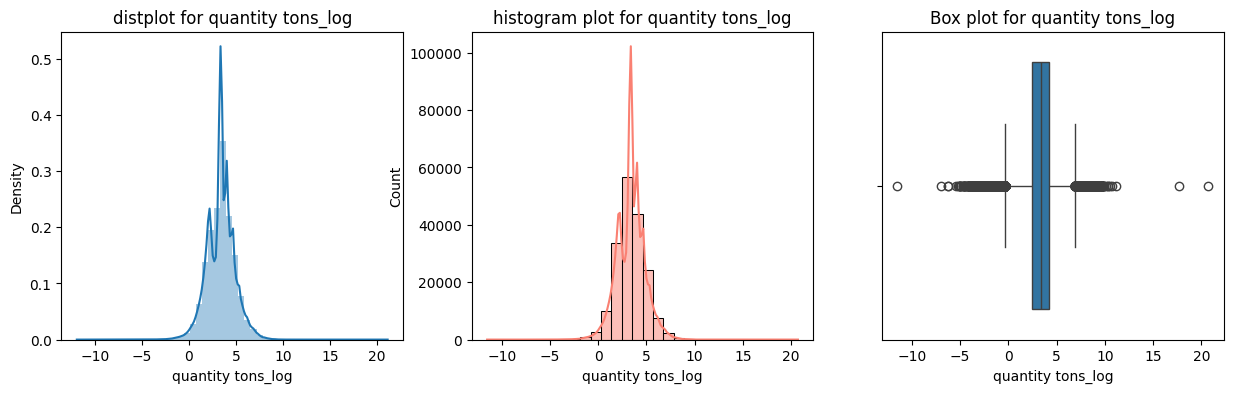

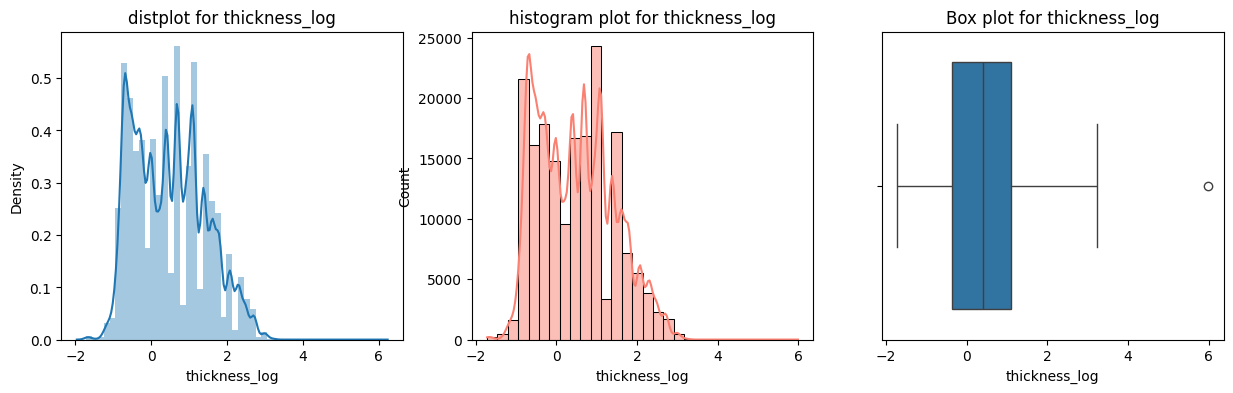

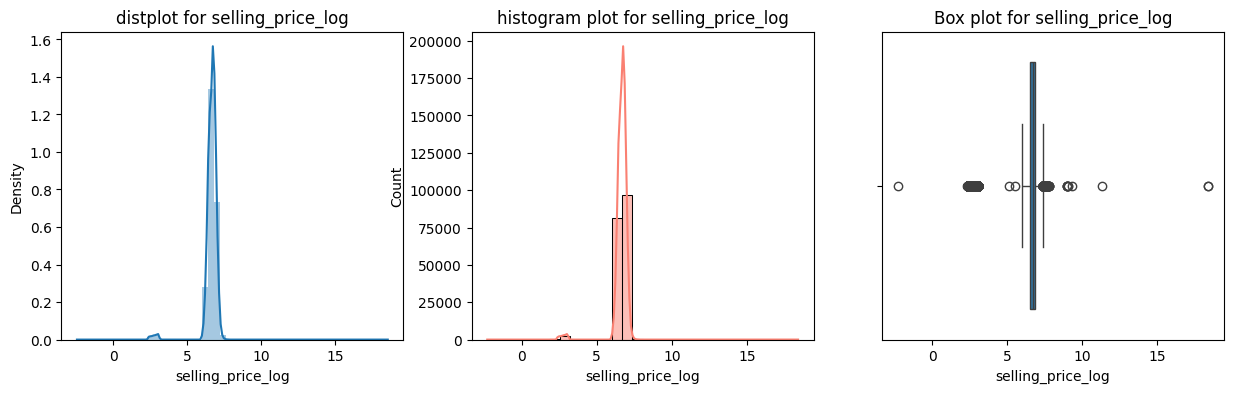

In [26]:
skwed_columns_2=["quantity tons_log","thickness_log","selling_price_log"]
for i in skwed_columns_2:
  plot(df_p,i)


In [27]:
df_p.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,1.0,5.0,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0,6.643822,-0.223144,6.953684


**Checking Corelation Using Heatmaps**

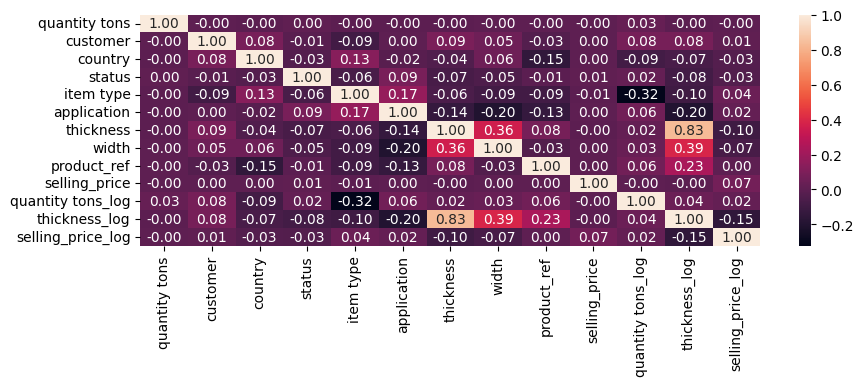

In [28]:
corr= df_p.drop(columns=["id","item_date","delivery date","material_ref"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f")
plt.show()

In [29]:
df_p.isnull().sum()

id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
quantity tons_log    0
thickness_log        0
selling_price_log    0
dtype: int64

In [30]:
df_p.to_csv("Cu_Pre.csv", index=False)

**Predicting Selling Price using Linear regression**

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X=df_p[["thickness_log","width","country","selling_price","product_ref","application","item type","customer","quantity tons"]].values
Y=df_p[['selling_price_log']].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
# Linear Regression
model=LinearRegression().fit(X_train,y_train)
model

y_pred=model.predict(X_test)
y_pred_normal = np.exp(y_pred)
y_test_normal = np.exp(y_test)
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_normal, y_pred_normal))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_normal, y_pred_normal))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_normal, y_pred_normal)))
r2 = r2_score(y_test_normal, y_pred_normal)
print('R² score:', r2)

Mean Absolute Error: 161.19414961274998
Mean Squared Error: 46418.1339901727
Root Mean Squared Error: 215.44868064152237
R² score: 0.0886571259853457


In [32]:
user_data = np.array([[6.749931,0.693147,3.991779,1670798778,1500.0,2.0,10.0,5.0,30156308.0]])
y_pred = model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  [198.35225798]
Predicted selling price without Log:  [1.39088466e+86]


In [33]:
# Saving the model
import pickle
with open('Linear.pkl', 'wb') as file:
  pickle.dump(model, file)

In [34]:
print(len(df_p))
df_p.head(3)

181620


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,1.0,5.0,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,1.0,6.0,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211


In [35]:
# filter the status column only want to be a (won& loss)
df_c= df_p[(df_p["status"] == 1) | (df_p["status"] == 0)]

In [36]:
df_c.to_csv("Cu_Class.csv", index=False)

**STATUS CLASSIFICATION**

In [37]:
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.combine import SMOTETomek

import pickle

In [38]:
df_c.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,1.0,5.0,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.0,4.670802,-0.040822,6.400257
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,1.0,5.0,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.0,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,1.0,5.0,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.0,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,1.0,5.0,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.0,1.443523,-0.342490,6.428105
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,2020-07-02,406.686538,30200854.0,25.0,1.0,5.0,41.0,0.71,1240.0,1005439,164141591,2020-07-01,607.0,6.008043,-0.342490,6.408529


In [39]:
df_c["status"].value_counts()

status
1.0    115996
0.0     34431
Name: count, dtype: int64

In [40]:
x= df_c[["thickness_log","width","country","selling_price","product_ref","application","item type","customer","quantity tons"]].values
y= df_c[["status"]].values

In [41]:
x.shape,y.shape

((150427, 9), (150427, 1))

In [42]:
x_new,y_new= SMOTETomek().fit_resample(x,y)

In [43]:
x_new.shape,y_new.shape

((227596, 9), (227596,))

In [44]:
def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)


  y_pred= model.predict(x_test)

  #checking the accuracy_score
  accuracy_test= accuracy_score(y_test, y_pred)

  metrics = {
        "Algorithm": algorithm.__name__,
        "Accuracy_Test": accuracy_test,}
  return metrics

In [45]:
print(accuracy_checking(x,y,LogisticRegression))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'LogisticRegression', 'Accuracy_Test': 0.7672671674533006}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Test': 0.9326264707837533}
{'Algorithm': 'XGBClassifier', 'Accuracy_Test': 0.8987236588446453}


In [46]:
print(accuracy_checking(x_new,y_new,LogisticRegression))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'LogisticRegression', 'Accuracy_Test': 0.5464411247803164}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Test': 0.9692003514938489}
{'Algorithm': 'XGBClassifier', 'Accuracy_Test': 0.9121924428822495}


In [47]:
def predict_threshold (model,X_test,thresholds):
   import numpy as np
   return np.where(model.predict_proba(x_test)[:,1]>thresholds,1,0) # Threshold is 0.5

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
  y_predict = predict_threshold(model,x_test,thr)
  print("Threshold :",thr)
  print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  969 21856]
 [    0 22695]]
Threshold : 0.1
[[13476  9349]
 [   59 22636]]
Threshold : 0.2
[[18683  4142]
 [  276 22419]]
Threshold : 0.30000000000000004
[[20995  1830]
 [  650 22045]]
Threshold : 0.4
[[21915   910]
 [ 1120 21575]]
Threshold : 0.5
[[22322   503]
 [ 1619 21076]]
Threshold : 0.6000000000000001
[[22658   167]
 [ 2390 20305]]
Threshold : 0.7000000000000001
[[22731    94]
 [ 3332 19363]]
Threshold : 0.8
[[22773    52]
 [ 4532 18163]]
Threshold : 0.9
[[22804    21]
 [ 6533 16162]]


In [49]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= ExtraTreesClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9713251609218129
Accuracy_Test:  0.9533831282952548
  
Confution_matrix for Test
--------------------------
[[22322   503]
 [ 1619 21076]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     22825
         1.0       0.98      0.93      0.95     22695

    accuracy                           0.95     45520
   macro avg       0.95      0.95      0.95     45520
weighted avg       0.95      0.95      0.95     45520



In [51]:
model.predict_proba(x_test)

array([[0.0457586 , 0.9542414 ],
       [0.13627612, 0.86372388],
       [0.00865917, 0.99134083],
       ...,
       [0.21067235, 0.78932765],
       [0.08845133, 0.91154867],
       [0.90577693, 0.09422307]])

In [52]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[2. 1. 0.]
[0.         0.02203724 1.        ]
[0.        0.9286627 1.       ]
 
auc_curve: 0.9533127305834526


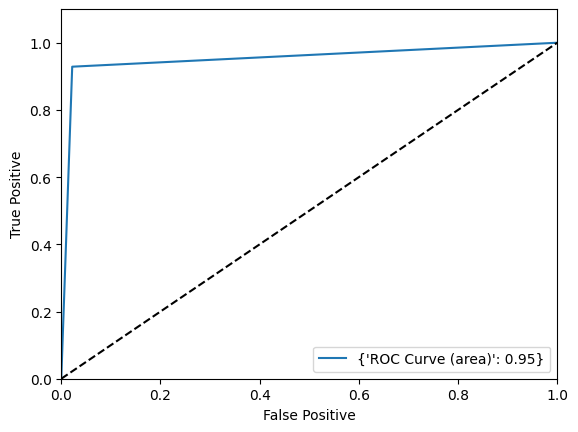

In [53]:
# create a plot for roc and auc curve
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [54]:
df_c.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,1.0,5.0,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0,6.643822,-0.223144,6.953684


In [55]:
# Predict the status for a new sample
user_data = np.array([[106.783299,30200854.0,25.0,5.0,41.0,0.96,1240.0,164141591,4.670802]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


In [56]:
#saving the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)


In [60]:
%%writefile Copper.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
import streamlit as st
import re
from streamlit_option_menu import option_menu

df_p= pd.read_csv("/content/Cu_Pre.csv")
df_c= pd.read_csv("/content/Cu_Class.csv")

status_options = ['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
item_type_options = ['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
country_options = [28., 25., 30., 32., 38., 78., 27., 77., 113., 79., 26., 39., 40., 84., 80., 107., 89.]
application_options = [10., 41., 28., 59., 15., 4., 38., 56., 42., 26., 27., 19., 20., 66., 29., 22., 40., 25., 67., 79., 3., 99., 2., 5., 39., 69., 70., 65., 58., 68.]
product=['611112', '611728', '628112', '628117', '628377', '640400', '640405', '640665',
              '611993', '929423819', '1282007633', '1332077137', '164141591', '164336407',
              '164337175', '1665572032', '1665572374', '1665584320', '1665584642', '1665584662',
              '1668701376', '1668701698', '1668701718', '1668701725', '1670798778', '1671863738',
              '1671876026', '1690738206', '1690738219', '1693867550', '1693867563', '1721130331', '1722207579']

st.set_page_config(layout= "wide")
st.markdown("""
    <h1 style='text-align: center;'>Industrial Copper Modeling</h1>
    """, unsafe_allow_html=True)
st.write("")

st.markdown(f""" <style>.stApp {{
                        background:url("https://m.foolcdn.com/media/dubs/original_images/Industry_business_production_and_heavy_metallurgical_industrial_products_m.jpg");
                        background-size: cover}}
                     </style>""", unsafe_allow_html=True)

select = option_menu(
    menu_title = None,
    options = ["HOME","PREDICT SELLING PRICE","STATUS CLASSIFICATION"],
    icons =["house","bar-chart"],orientation="horizontal")
if select == "HOME":
  text_content = """
    <h2 style='text-align: center; color: white;'>Welcome to my Industrial Copper Modeling project</h2>
    <p style='font-size: 18px; text-align: center;'>In this project we revolutionize the copper industry through data-driven precision. In a landscape fraught with complexities, we address data quality issues in sales and pricing with advanced machine learning techniques like normalization, scaling, and outlier detection. Additionally, our lead classification model sifts through leads, identifying high-potential prospects to optimize resource allocation. By integrating these solutions into our Streamlit application, we empower stakeholders with actionable insights for informed decision-making and sustained growth.</p>
        """

  # Display the text using markdown function
  st.markdown(text_content, unsafe_allow_html=True)



if select == "PREDICT SELLING PRICE":
  with st.form("my_form"):
    col1,col2,col3=st.columns([5,2,5])
    with col1:
        st.write(' ')
        status = st.selectbox("Status", status_options,key=1)
        item_type = st.selectbox("Item Type", item_type_options,key=2)
        country = st.selectbox("Country", sorted(country_options),key=3)
        application = st.selectbox("Application", sorted(application_options),key=4)
        product_ref = st.selectbox("Product Reference", product,key=5)

    with col3:
        st.write( f'NOTE: Min & Max given for reference, you can enter any value', unsafe_allow_html=True )
        quantity_tons = st.text_input("Enter Quantity Tons (Min:611728 & Max:1722207579)")
        thickness = st.text_input("Enter thickness (Min:0.18 & Max:400)")
        width = st.text_input("Enter width (Min:1, Max:2990)")
        customer = st.text_input("customer ID (Min:12458, Max:30408185)")
        submit_button = st.form_submit_button(label="PREDICT SELLING PRICE")
        st.markdown("""

        """, unsafe_allow_html=True)

        flag=0
        pattern = "^(?:\d+|\d*\.\d+)$"
        for i in [quantity_tons,thickness,width,customer]:
          if re.match(pattern, i):
            pass
          else:
            flag=1
            break

        if submit_button and flag==1:
            if len(i)==0:
                st.write("please enter a valid number space not allowed")
            else:
                st.write("You have entered an invalid value: ",i)

        if submit_button and flag==0:
          import pickle
          with open(r"/content/Linear.pkl", 'rb') as file:
              loaded_model = pickle.load(file)

              user_data =df_p[["thickness_log","width","country","selling_price","product_ref","application","item type","customer","quantity tons"]].values

              # Make predictions using the loaded model
              y_pred_user = loaded_model.predict(user_data)
          st.write('## :green[Predicted selling price:] ', np.exp(y_pred_user)[0])

if select == "STATUS CLASSIFICATION":
  with st.form("my_form1"):
    col1,col2,col3=st.columns([5,1,5])
    with col1:
        cquantity_tons = st.text_input("Enter Quantity Tons (Min:611728 & Max:1722207579)")
        cthickness = st.text_input("Enter thickness (Min:0.18 & Max:400)")
        cwidth = st.text_input("Enter width (Min:1, Max:2990)")
        ccustomer = st.text_input("customer ID (Min:12458, Max:30408185)")
        cselling = st.text_input("Selling Price (Min:1, Max:100001015)")


    with col3:
        st.write(' ')
        citem_type = st.selectbox("Item Type", item_type_options,key=21)
        ccountry = st.selectbox("Country", sorted(country_options),key=31)
        capplication = st.selectbox("Application", sorted(application_options),key=41)
        cproduct_ref = st.selectbox("Product Reference", product,key=51)
        csubmit_button = st.form_submit_button(label="PREDICT STATUS")
        st.markdown("""

        """, unsafe_allow_html=True)

    cflag=0
    pattern = "^(?:\d+|\d*\.\d+)$"
    for k in [cquantity_tons,cthickness,cwidth,ccustomer,cselling]:
        if re.match(pattern, k):
          pass
        else:
          cflag=1
          break

  if csubmit_button and cflag==1:
    if len(k)==0:
      st.write("please enter a valid number space not allowed")
    else:
      st.write("You have entered an invalid value: ",k)

  if csubmit_button and cflag==0:
    import pickle
    with open(r"/content/Linear.pkl", 'rb') as file:
      loaded_model = pickle.load(file)
      user_data =df_c[["thickness_log","width","country","selling_price","product_ref","application","item type","customer","quantity tons"]].values
      # Make predictions using the loaded model
      y_pred_user = loaded_model.predict(user_data)
      # Assuming '1' represents "Won" and '0' represents "Lose"
      if (y_pred_user == 1).any():
          st.write('## :green[The Status is Won]')

      else:
          st.write("## :red[The status is Lost] ")





Overwriting Copper.py


In [58]:
!wget -q -O - ipv4.icanhazip.com

34.125.23.57


In [ ]:
! streamlit run Copper.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.23.57:8501

npx: installed 22 in 2.648s
your url is: https://swift-dots-drop.loca.lt
